# Chapter 5. 手書きの文字を認識しよう

## Lesson 39. scikit-learnのデータセットを使ってみましょう

In [53]:
from sklearn import datasets


X, y = datasets.load_digits(return_X_y=True)

In [54]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
X.shape

(1797, 64)

In [22]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
y.shape

(1797,)

## Lesson 40. 読み込んだ画像を表示してみましょう

In [24]:
X0 = X[0]  # `X` の先頭のデータを取り出す
X0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [25]:
X0.shape  # 変形前のshapeを確認する


(64,)

In [26]:
X0_square = X0.reshape(8, 8)  # 8ピクセル四方に変形する
X0_square

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [27]:
X0_square.shape  # shapeを確認する

(8, 8)

In [28]:
# XXX: 本文中にはないコード
# Jupyter Notebook の問題で、 `pyplot` モジュールの初回 import 時にグラフが表示されない
from matplotlib import pyplot

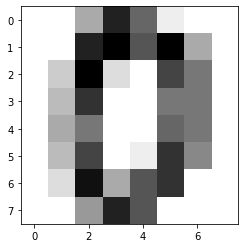

In [29]:
from matplotlib import pyplot


fig, ax = pyplot.subplots()
ax.imshow(X0_square, cmap='binary')

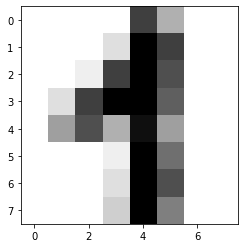

In [30]:
fig, ax = pyplot.subplots()

X42 = X[42].reshape(8, 8)  # 42番目のデータを取り出して8ピクセル四方に変形する
ax.imshow(X42, cmap='binary')

In [31]:
X0_square[1][5]  # 1行、5列の値を取り出して表示する

15.0

In [32]:
X0_square[3][3]  # 3行、3列の値を取り出して表示する


0.0

In [33]:
X0_square[4][2]  # 4行、2列の値を取り出して表示する


8.0

## Lesson 41. UCIの手書き数字データセットを学習させてみましょう

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto')
clf

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
clf.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

## Lesson 42. 自分で手書きした文字を読み込みましょう

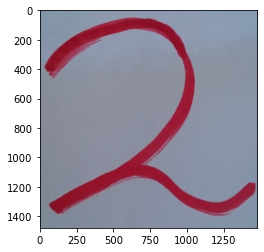

In [37]:
from PIL import Image

im = Image.open('mydigit.jpg')
fig, ax = pyplot.subplots()  # axはAxesオブジェクト
ax.imshow(im)

## Lesson 43. Pillowを使って手書き文字を前処理しましょう

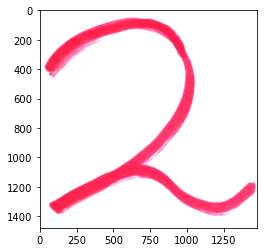

In [44]:
from PIL import ImageEnhance

im_enhanced = ImageEnhance.Brightness(im).enhance(2.0)
fig, ax = pyplot.subplots()
ax.imshow(im_enhanced)

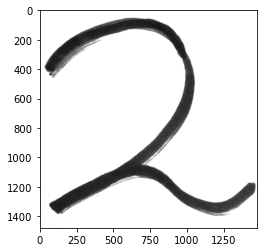

In [45]:
im_gray = im_enhanced.convert(mode='L')
fig, ax = pyplot.subplots()
ax.imshow(im_gray, cmap='gray')

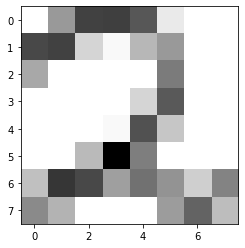

In [46]:
im_8x8 = im_gray.resize((8, 8))
fig, ax = pyplot.subplots()
ax.imshow(im_8x8, cmap='gray')

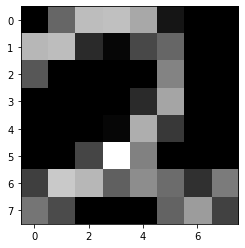

In [47]:
from PIL import ImageOps

im_inverted = ImageOps.invert(im_8x8)
fig, ax = pyplot.subplots()
ax.imshow(im_inverted, cmap='gray')

## Lesson 44. NumPyを使って画像をndarrayに変換しましょう

In [48]:
import numpy


X_im2d = numpy.asarray(im_inverted)  # 2次元のndarrayに変換
X_im2d  # 表示する

array([[ 0, 34, 63, 64, 56,  7,  0,  0],
       [61, 63, 14,  2, 24, 34,  0,  0],
       [29,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  0, 14, 55,  0,  0],
       [ 0,  0,  0,  2, 58, 19,  0,  0],
       [ 0,  0, 23, 85, 43,  0,  0,  0],
       [21, 67, 61, 32, 47, 36, 16, 41],
       [39, 25,  0,  0,  0, 33, 52, 22]], dtype=uint8)

In [49]:
X_im1d = X_im2d.reshape(-1)  # 1次元のndarrayに変換する
X_im1d  # 表示する

array([ 0, 34, 63, 64, 56,  7,  0,  0, 61, 63, 14,  2, 24, 34,  0,  0, 29,
        0,  0,  0,  0, 44,  0,  0,  0,  0,  0,  0, 14, 55,  0,  0,  0,  0,
        0,  2, 58, 19,  0,  0,  0,  0, 23, 85, 43,  0,  0,  0, 21, 67, 61,
       32, 47, 36, 16, 41, 39, 25,  0,  0,  0, 33, 52, 22], dtype=uint8)

In [50]:
X_multiplied = X_im1d * (16 / 255)  # 0~255の値を0~16に変換
X_multiplied  # 表示する

array([0.        , 2.13333333, 3.95294118, 4.01568627, 3.51372549,
       0.43921569, 0.        , 0.        , 3.82745098, 3.95294118,
       0.87843137, 0.1254902 , 1.50588235, 2.13333333, 0.        ,
       0.        , 1.81960784, 0.        , 0.        , 0.        ,
       0.        , 2.76078431, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.87843137, 3.45098039,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1254902 , 3.63921569, 1.19215686, 0.        , 0.        ,
       0.        , 0.        , 1.44313725, 5.33333333, 2.69803922,
       0.        , 0.        , 0.        , 1.31764706, 4.20392157,
       3.82745098, 2.00784314, 2.94901961, 2.25882353, 1.00392157,
       2.57254902, 2.44705882, 1.56862745, 0.        , 0.        ,
       0.        , 2.07058824, 3.2627451 , 1.38039216])

## Lesson 45. 自分で手書きした文字を予測させてみましょう

In [52]:
clf.predict([X_multiplied])[0]

2

## Lesson 46. 分類モデルの精度を評価してみましょう

In [55]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [56]:
X_train.shape

(1347, 64)

In [57]:
X_test.shape

(450, 64)

In [58]:
y_train.shape

(1347,)

In [59]:
y_test.shape

(450,)

In [60]:
clf_acc = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto')  # モデルを作成する
clf_acc.fit(X_train, y_train)  # 分割後の教師データを学習させる

LogisticRegression(random_state=0, solver='liblinear')

In [62]:
y_pred = clf_acc.predict(X_test)  # ラベルを予測する
y_pred  # 予測結果を表示する

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 1, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 1, 4, 2, 1, 6, 9, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9533333333333334

正解 1
予測結果 8


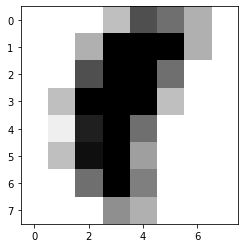

In [66]:
for i in range(len(y_test)):
    y_test_i = y_test[i]  # i番目のテストデータのラベル
    y_pred_i = y_pred[i]  # i番目のテストデータの特徴ベクトルから予測されたラベル
    if y_test_i != y_pred_i:
        # i番目のテストデータを表示する
        fig, ax = pyplot.subplots()
        ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
        # 正解と予測結果を表示する
        print('正解', y_test_i)
        print('予測結果', y_pred_i)
        break  # ひとつ目だけ表示して終わる

## Lesson 47. 複数のモデルを比較してよりよいモデルを選びましょう

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0, n_estimators=10)  # モデルをインスタンス化する
clf_rf.fit(X_train, y_train)  # 教師データを学習させる

RandomForestClassifier(n_estimators=10, random_state=0)

In [72]:
from sklearn.ensemble import RandomForestClassifier

y_pred = clf_rf.predict(X_test)  # テストデータを予測させる
accuracy_score(y_test, y_pred)  # 正解率を算出する

0.94

## Lesson 48. 学習済みモデルを作ってみましょう

In [74]:
import pickle


with open('trained-model.pickle', 'wb') as f:  # wbモードで保存先を開く
    pickle.dump(clf, f)  # 学習済みモデルを保存先に書き出す